In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load COVID-19 dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_data = pd.read_csv(url)

Vizualize the dataframe by display it.



In [46]:
print(covid_data.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

# **Data Cleaning 🧽**

 Convert the 'date' columns into datatime in order to manipulate it easily:
  *   By using the pandas function to_datatime




In [47]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
print(covid_data)

       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan 2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan 2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan 2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan 2020-01-07          NaN        0.0   
...         ...       ...          ...        ...          ...        ...   
329038      ZWE    Africa     Zimbabwe 2023-07-22     265666.0        0.0   
329039      ZWE    Africa     Zimbabwe 2023-07-23     265666.0        0.0   
329040      ZWE    Africa     Zimbabwe 2023-07-24     265666.0        0.0   
329041      ZWE    Africa     Zimbabwe 2023-07-25     265666.0        0.0   
329042      ZWE    Africa     Zimbabwe 2023-07-26     265666.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

##*I am going to choose the relevant columns from the dataset:*
   * 'iso_code'
   * 'location'
   * 'date'
   * 'total_cases'
   * 'total_deaths'
   * 'new_cases'
   * 'new_deaths'
   * 'people_fully_vaccinated_per_hundred'

## *I will remove the following column by not adding it:*

   * 'continent'


In [48]:
cols = ['iso_code', 'location', 'date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths','people_fully_vaccinated_per_hundred']
covid_data = covid_data[cols]
print(covid_data)

       iso_code     location       date  total_cases  total_deaths  new_cases  \
0           AFG  Afghanistan 2020-01-03          NaN           NaN        0.0   
1           AFG  Afghanistan 2020-01-04          NaN           NaN        0.0   
2           AFG  Afghanistan 2020-01-05          NaN           NaN        0.0   
3           AFG  Afghanistan 2020-01-06          NaN           NaN        0.0   
4           AFG  Afghanistan 2020-01-07          NaN           NaN        0.0   
...         ...          ...        ...          ...           ...        ...   
329038      ZWE     Zimbabwe 2023-07-22     265666.0        5711.0        0.0   
329039      ZWE     Zimbabwe 2023-07-23     265666.0        5711.0        0.0   
329040      ZWE     Zimbabwe 2023-07-24     265666.0        5711.0        0.0   
329041      ZWE     Zimbabwe 2023-07-25     265666.0        5711.0        0.0   
329042      ZWE     Zimbabwe 2023-07-26     265666.0        5711.0        0.0   

        new_deaths  people_

The isin() function in Pandas is used to check if each element in a Pandas Series is contained in a specified list or array. "covid_data['iso_code'].isin(countries)" checks whether each element in the 'iso_code' column of the DataFrame covid_data is present in the countries list.




# **Data Exploratory Data Analysis 🔍**

In [49]:
# Filter data for specific countries
countries = ['USA', 'IND', 'BRA', 'RUS', 'GBR', 'CHN', 'ITA']
covid_data_countries = covid_data[covid_data['iso_code'].isin(countries)]
print(covid_data_countries)

       iso_code       location       date  total_cases  total_deaths  \
39052       BRA         Brazil 2020-01-03          NaN           NaN   
39053       BRA         Brazil 2020-01-04          NaN           NaN   
39054       BRA         Brazil 2020-01-05          NaN           NaN   
39055       BRA         Brazil 2020-01-06          NaN           NaN   
39056       BRA         Brazil 2020-01-07          NaN           NaN   
...         ...            ...        ...          ...           ...   
310911      USA  United States 2023-07-22  103436829.0     1127152.0   
310912      USA  United States 2023-07-23  103436829.0     1127152.0   
310913      USA  United States 2023-07-24  103436829.0     1127152.0   
310914      USA  United States 2023-07-25  103436829.0     1127152.0   
310915      USA  United States 2023-07-26  103436829.0     1127152.0   

        new_cases  new_deaths  people_fully_vaccinated_per_hundred  
39052         0.0         0.0                                  NaN

# **Data Visualization** 🕵

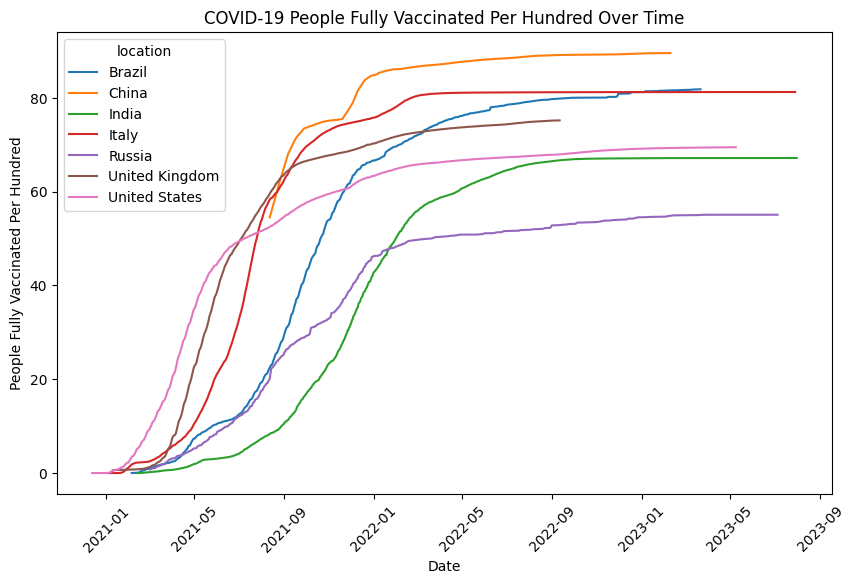

In [50]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='people_fully_vaccinated_per_hundred', hue='location')
plt.title('COVID-19 People Fully Vaccinated Per Hundred Over Time')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated Per Hundred')
plt.xticks(rotation=45)
plt.show()

In January 2023, China achieved an extraordinary feat, surpassing other nations by achieving the highest level of fully vaccinated people, with around 90 per hundred, even though it started its vaccination efforts later. This remarkable achievement sets China apart in terms of vaccination coverage. However, it is important to note that China suspended its vaccination campaign before the beginning of 2023. On the other hand, countries like India, Russia, and Brazil have made significant progress in fully vaccinating their populations, but their vaccination rates are still lower compared to China's impressive numbers.

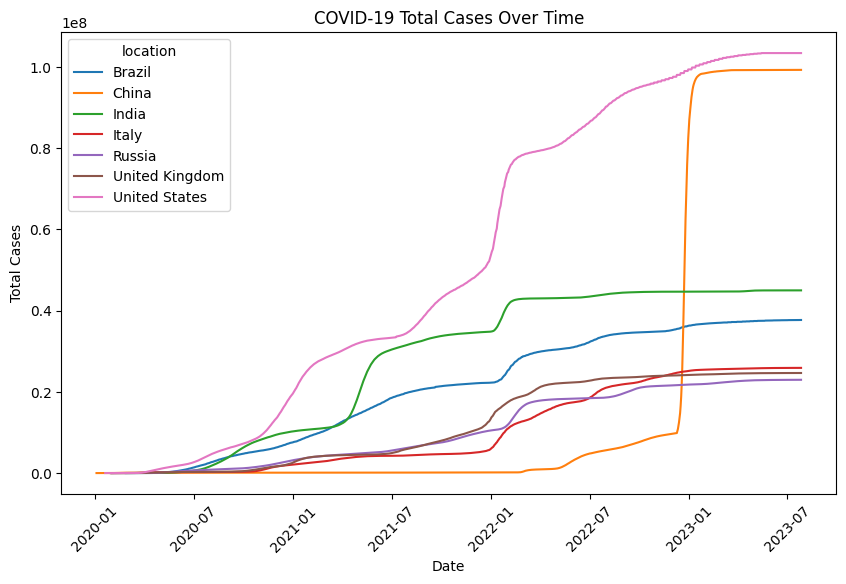

In [51]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='total_cases', hue='location')
plt.title('COVID-19 Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()


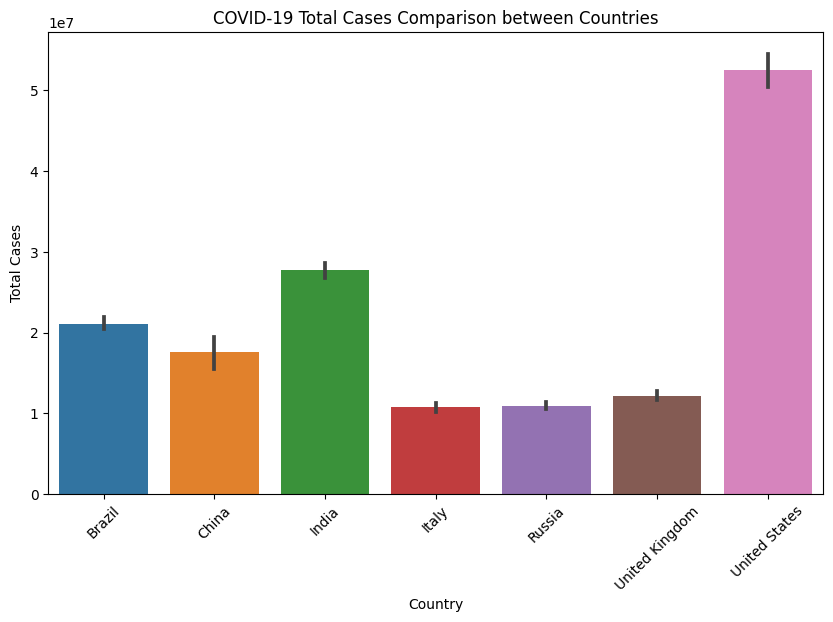

In [52]:
# Data Visualization - Cases Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=covid_data_countries, x='location', y='total_cases')
plt.title('COVID-19 Total Cases Comparison between Countries')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()


The graph titled 'COVID-19 Total Cases Over Time' depicts a significant surge in COVID-19 cases in China around January 2023. Additionally, the histogram graph titled 'COVID-19 Total Cases Comparison between Countries' provides a global perspective on the total cases of several countries.

In this comparison, the USA stands out with the highest number of COVID-19 cases, exceeding 100,000,000 cases, followed by India and Brazil. In contrast, China had the lowest rate of COVID-19 cases before the implementation of its 'zero-COVID' policy. However, after the policy was lifted, China experienced a drastic increase in cases, making it the country with the second-highest total COVID-19 cases.

**These visual representations highlight the changing dynamics of COVID-19 cases in different countries and emphasize the importance of analyzing data trends over time to understand the impact of various policies and measures.**

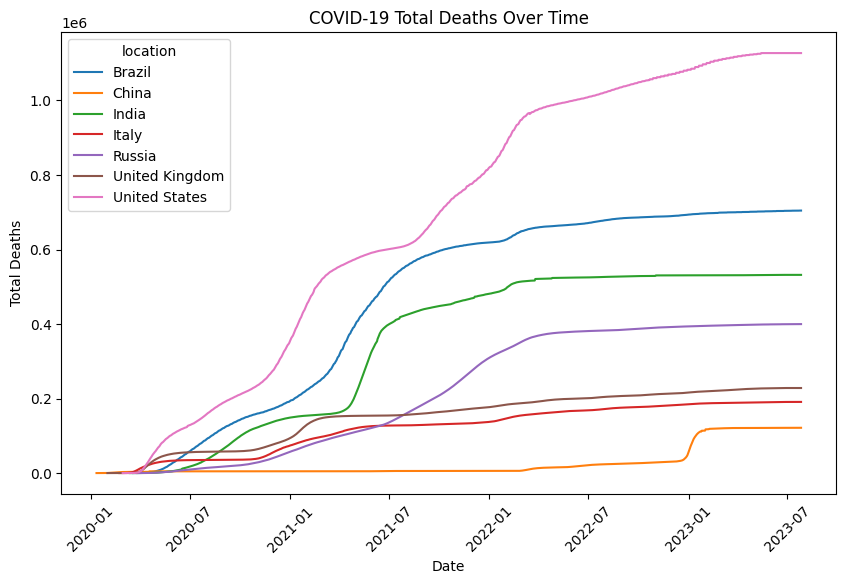

In [53]:
# Data Visualization - Total Deaths over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='total_deaths', hue='location')
plt.title('COVID-19 Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

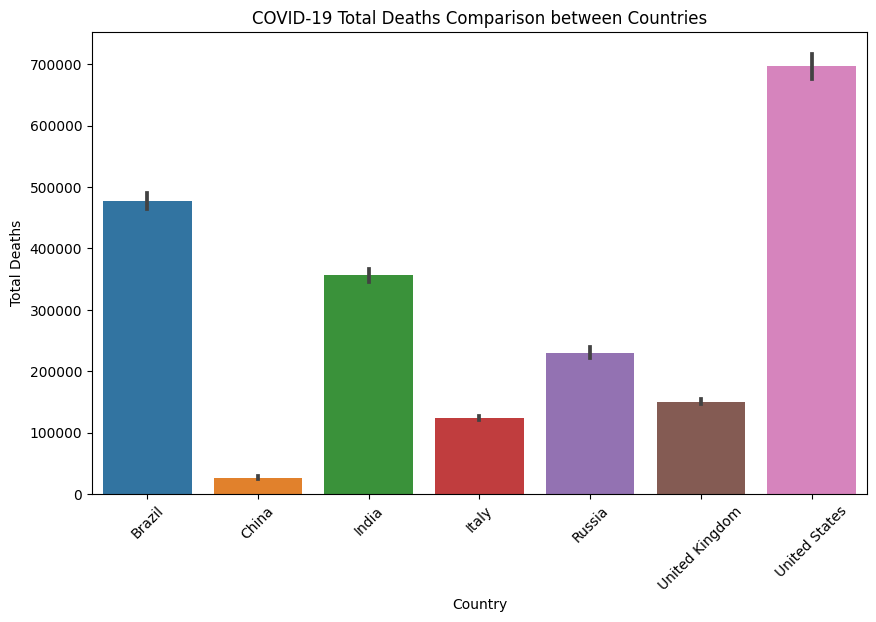

In [54]:
# Data Visualization - Deaths Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=covid_data_countries, x='location', y='total_deaths')
plt.title('COVID-19 Total Deaths Comparison between Countries')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

USA, Brazil, Russia, and India have experienced the highest total COVID-19 death toll, surpassing one million, 700,000, 500,000, and 300,000 deaths, respectively. This observation indicates a correlation between the timing, type of restriction policies and the rate of fatalities.

### **COVID-19 New Cases and Death Over Time**

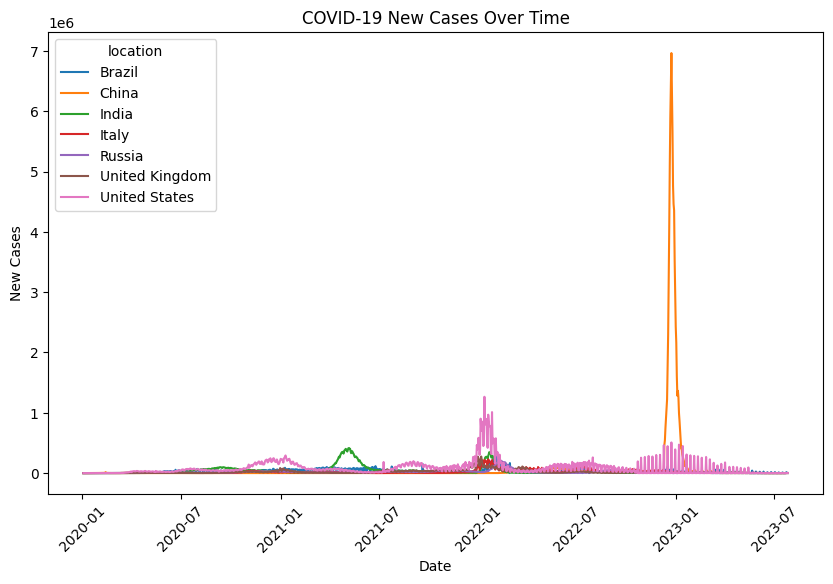

In [55]:

# Data Visualization - New Cases over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='new_cases', hue='location')
plt.title('COVID-19 New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.show()

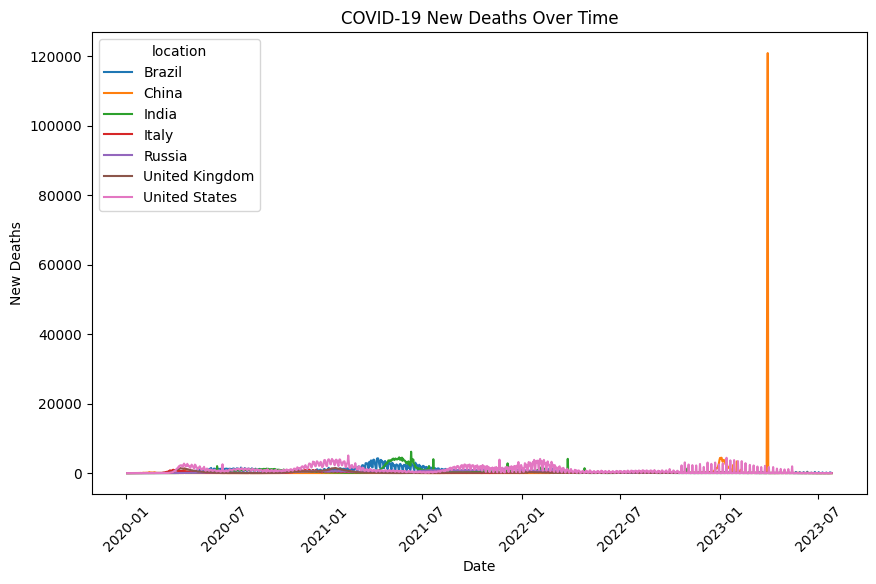

In [56]:
# Data Visualization - New Deaths over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='new_deaths', hue='location')
plt.title('COVID-19 New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.xticks(rotation=45)
plt.show()

In contrast, China reached the milestone of 100,000 deaths relatively late, aligning with the easing of their restriction policies at the end of their zero-covid policy in December 2023.